# YOLO v3 Object Detection

CODE SOURCE: https://github.com/xiaochus/YOLOv3

REFERENCE (for original YOLOv3): 

        @article{YOLOv3,  
              title={YOLOv3: An Incremental Improvement},  
              author={J Redmon, A Farhadi },
              year={2018} 

In [2]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO

Using TensorFlow backend.


In [3]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [4]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

In [5]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [6]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [7]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    video_path = os.path.join("videos", "test", video)
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [8]:
yolo = YOLO(0.6, 0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

/Users/glen/anaconda/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Detecting Images

In [9]:
f = 'friends.jpg'
path = 'images/'+f
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/' + f, image)

time: 10.27s
class: person, score: 1.00
box coordinate x,y,w,h: [305.51538086 881.17181396 461.84603882 632.57510376]
class: person, score: 0.97
box coordinate x,y,w,h: [1340.22888184  903.24490356  211.88609314  613.33937073]
class: person, score: 0.95
box coordinate x,y,w,h: [1179.86413574  912.42288208  245.34762573  607.64836121]
class: person, score: 0.94
box coordinate x,y,w,h: [834.8671875  856.27157593 284.03997803 680.17579651]
class: person, score: 0.94
box coordinate x,y,w,h: [1017.52697754  878.92327881  253.95948792  641.88409424]
class: person, score: 0.92
box coordinate x,y,w,h: [1500.3996582   892.63668823  199.61253357  638.92460632]
class: person, score: 0.91
box coordinate x,y,w,h: [1656.07177734  869.12823486  195.10948181  686.24189758]
class: person, score: 0.87
box coordinate x,y,w,h: [652.35876465 860.4392395  303.15640259 672.15788269]



True

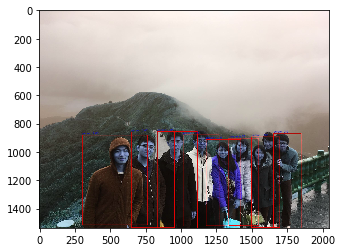

In [37]:
import matplotlib.pyplot as plt

img = cv2.imread('friends.jpg')
plt.imshow(img_bgr)
plt.show()

# Detecting on Video

In [38]:
# # detect videos one at a time in videos/test folder    
# video = 'library1.mp4'
# detect_video(video, yolo, all_classes)